
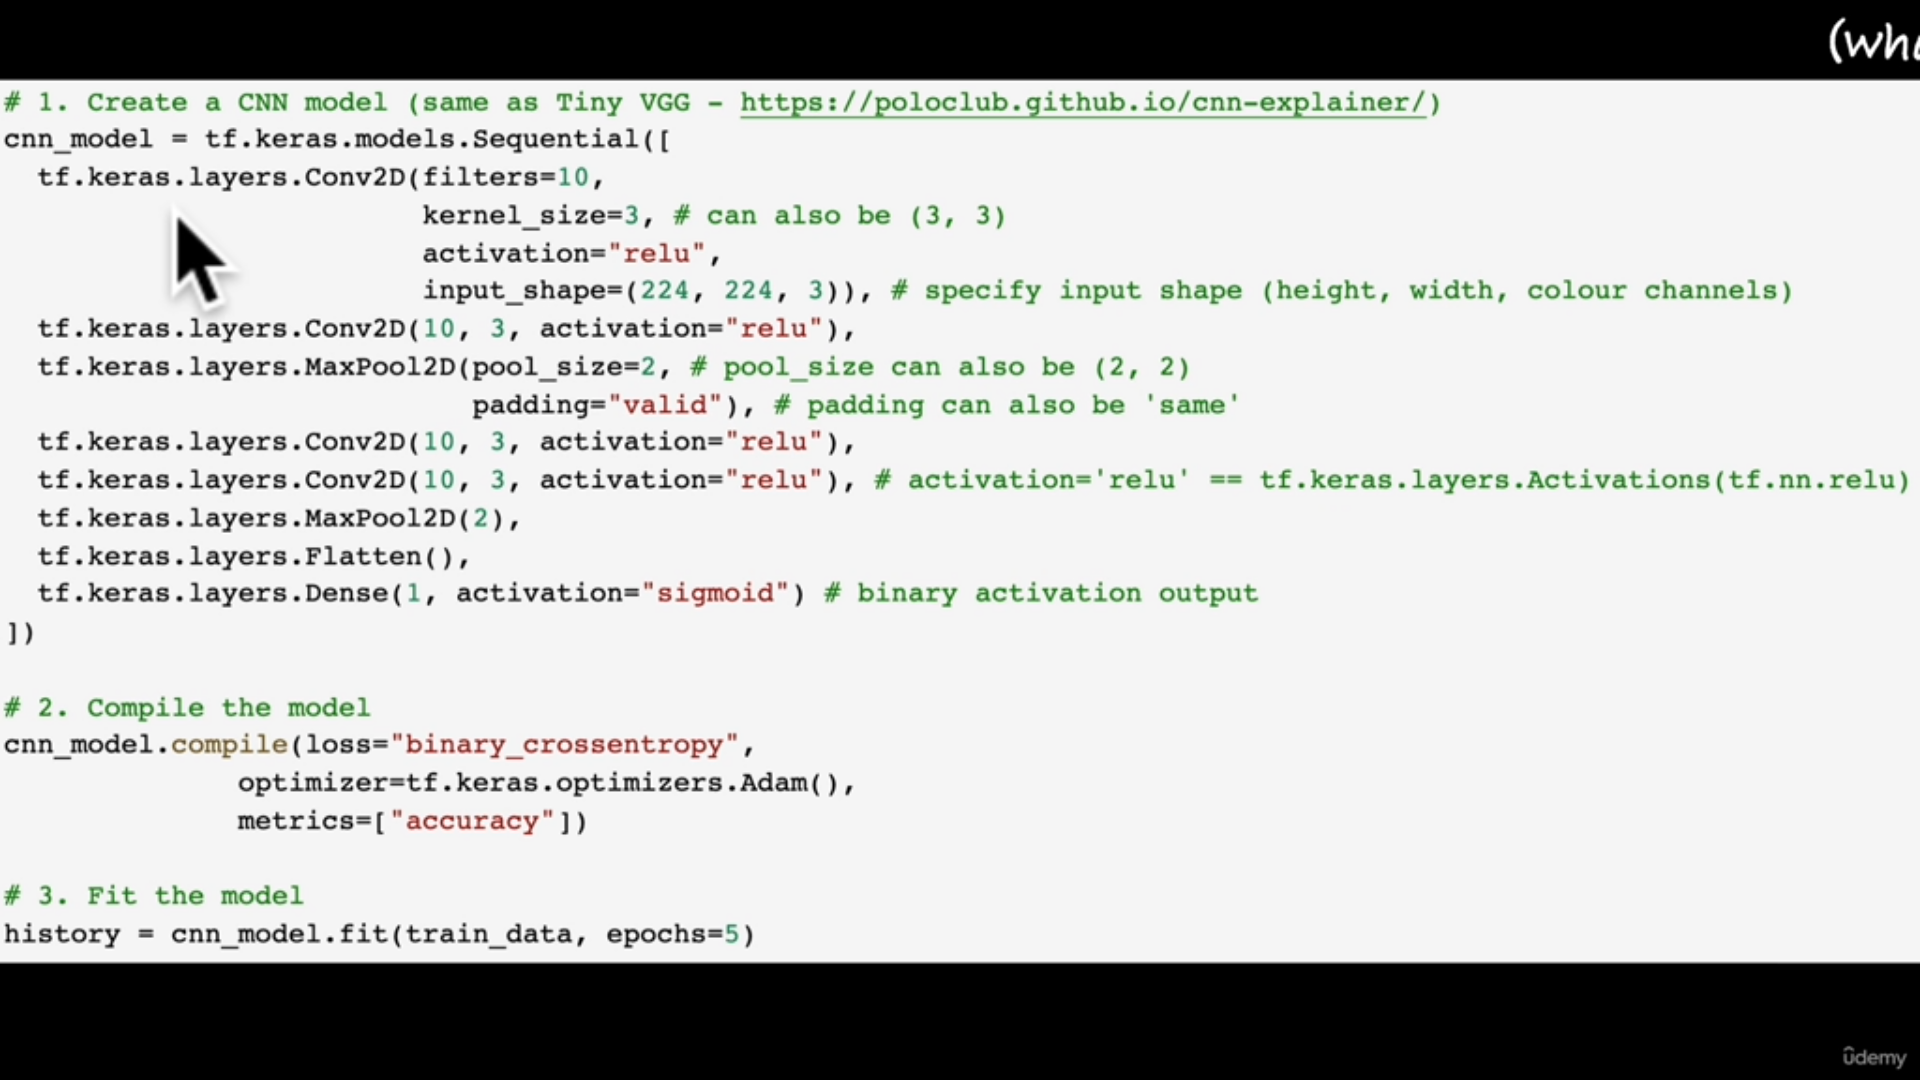

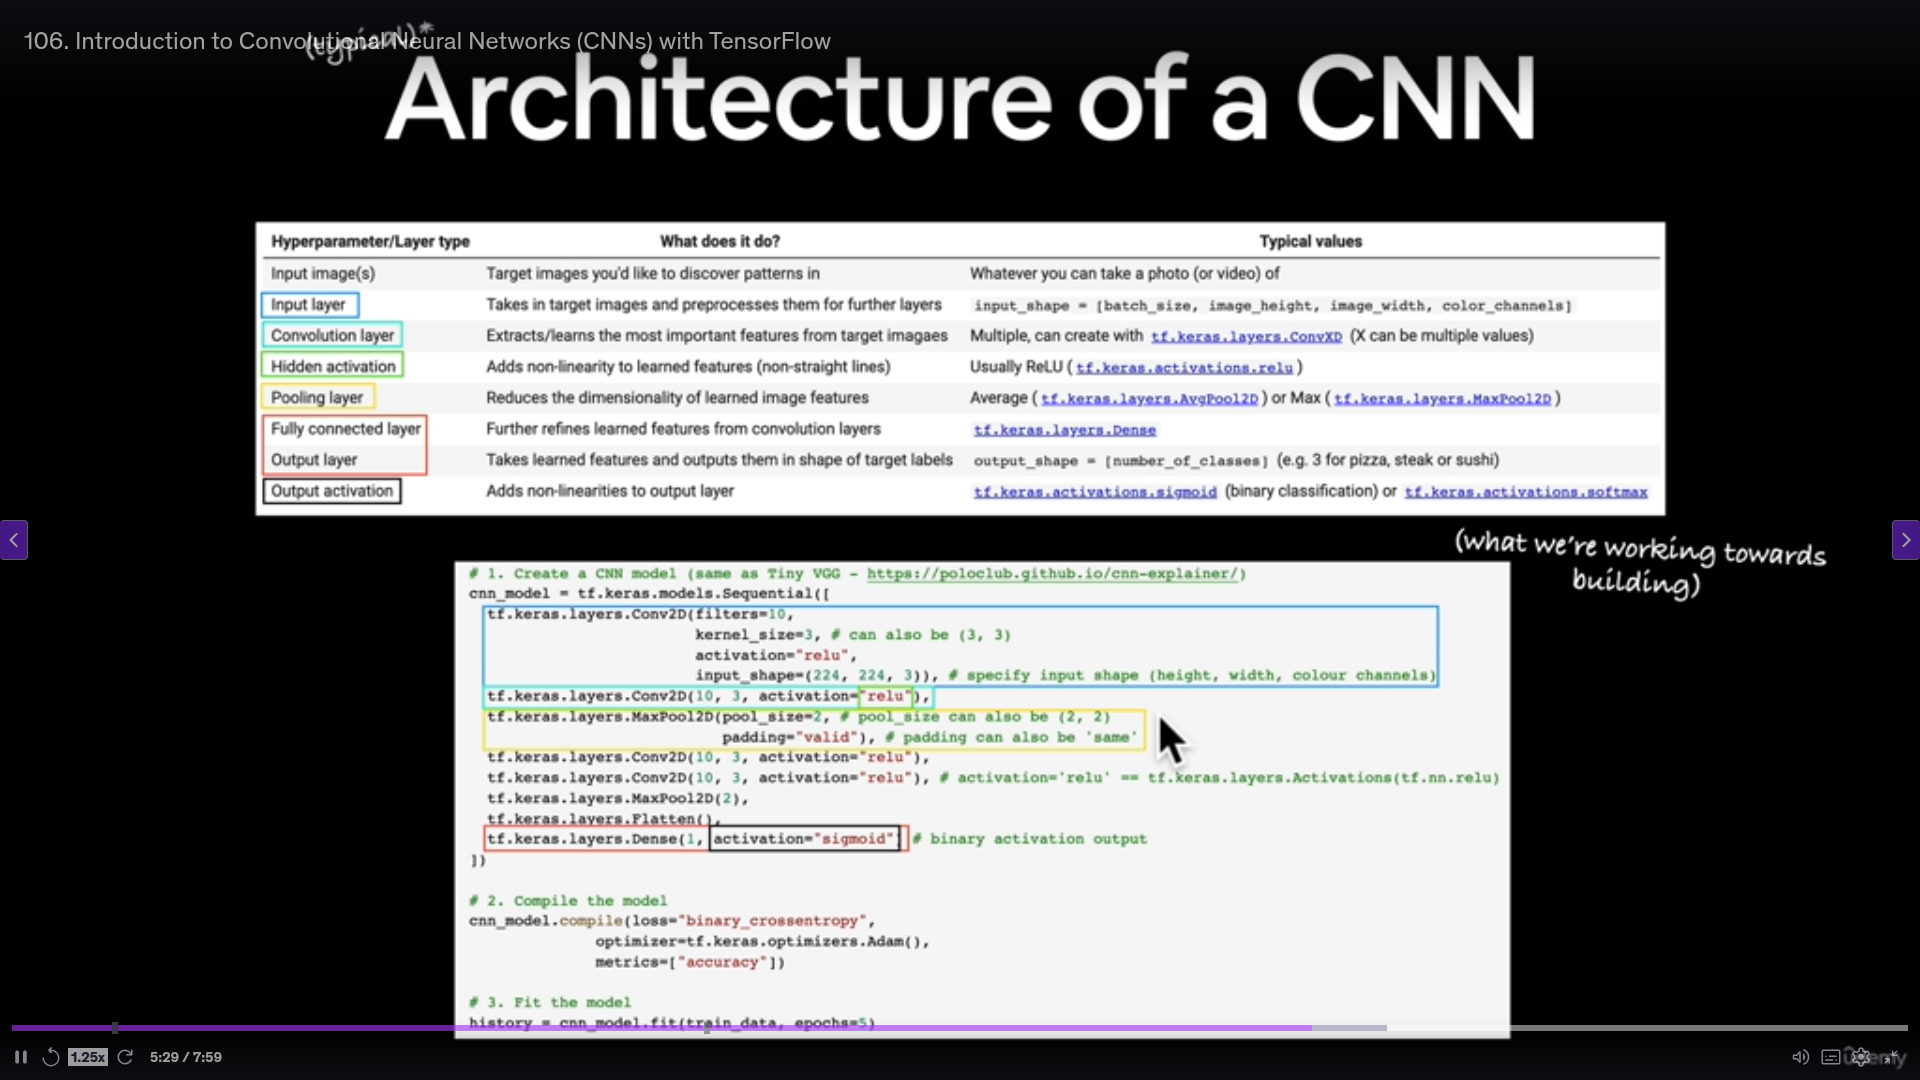

# Introduction to Convolutional Nueral Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2025-09-09 17:41:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.207, 172.217.218.207, 142.251.31.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  33.3MB/s    in 3.1s    

2025-09-09 17:41:55 (33.3 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a comuter vision project... this usually means visualizing many samples of our data.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os
# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [ ]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

['2893832.jpg']
Image shape: (512, 512, 3)


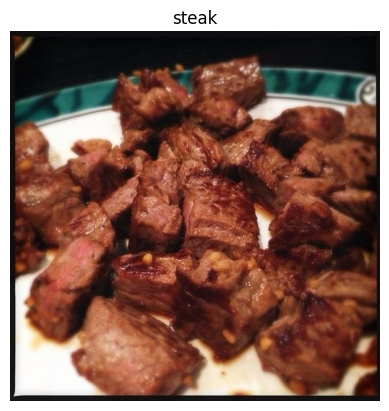

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

['3297714.jpg']
Image shape: (512, 512, 3)


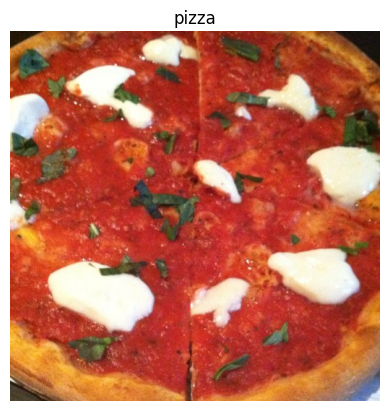

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 38,  24,  11],
        [ 35,  21,   8],
        [ 35,  21,   8],
        ...,
        [ 22,  21,  16],
        [ 19,  19,  11],
        [ 21,  21,  13]],

       [[ 36,  22,   9],
        [ 34,  20,   7],
        [ 33,  19,   6],
        ...,
        [ 21,  20,  15],
        [ 20,  20,  12],
        [ 20,  20,  12]],

       [[ 39,  26,  10],
        [ 36,  23,   7],
        [ 35,  21,   8],
        ...,
        [ 21,  20,  15],
        [ 21,  20,  15],
        [ 20,  19,  14]],

       ...,

       [[ 79,  66,  49],
        [ 78,  65,  48],
        [ 77,  64,  47],
        ...,
        [208, 220, 232],
        [213, 225, 239],
        [216, 228, 242]],

       [[ 77,  64,  47],
        [ 75,  62,  45],
        [ 76,  63,  46],
        ...,
        [213, 225, 237],
        [213, 225, 237],
        [213, 225, 237]],

       [[ 80,  67,  50],
        [ 79,  66,  49],
        [ 82,  69,  52],
        ...,
        [216, 228, 24

In [ ]:
# View the image shape
img.shape # returns width, height, colour channels

(512, 512, 3)

In [ ]:
# Get all the pixel values between 0 & 1
img / 255.

array([[[0.14901961, 0.09411765, 0.04313725],
        [0.1372549 , 0.08235294, 0.03137255],
        [0.1372549 , 0.08235294, 0.03137255],
        ...,
        [0.08627451, 0.08235294, 0.0627451 ],
        [0.0745098 , 0.0745098 , 0.04313725],
        [0.08235294, 0.08235294, 0.05098039]],

       [[0.14117647, 0.08627451, 0.03529412],
        [0.13333333, 0.07843137, 0.02745098],
        [0.12941176, 0.0745098 , 0.02352941],
        ...,
        [0.08235294, 0.07843137, 0.05882353],
        [0.07843137, 0.07843137, 0.04705882],
        [0.07843137, 0.07843137, 0.04705882]],

       [[0.15294118, 0.10196078, 0.03921569],
        [0.14117647, 0.09019608, 0.02745098],
        [0.1372549 , 0.08235294, 0.03137255],
        ...,
        [0.08235294, 0.07843137, 0.05882353],
        [0.08235294, 0.07843137, 0.05882353],
        [0.07843137, 0.0745098 , 0.05490196]],

       ...,

       [[0.30980392, 0.25882353, 0.19215686],
        [0.30588235, 0.25490196, 0.18823529],
        [0.30196078, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in pur images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_data_generator = ImageDataGenerator(rescale=1. / 255)
valid_data_generator = ImageDataGenerator(rescale=1. / 255)

# Setup paths to our
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_data_generator.flow_from_directory(directory=train_dir,
                                                      batch_size=32,
                                                      target_size=(224, 224),
                                                      class_mode="binary",
                                                      seed=42)
valid_data = valid_data_generator.flow_from_directory(directory=test_dir,
                                                    batch_size=32,
                                                    target_size=(224, 224),
                                                    class_mode="binary",
                                                    seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explained website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10,
                    kernel_size=3,
                    activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu"),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 280ms/step - accuracy: 0.5780 - loss: 0.6552 - val_accuracy: 0.8180 - val_loss: 0.4277
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 145ms/step - accuracy: 0.7956 - loss: 0.4760 - val_accuracy: 0.8380 - val_loss: 0.3654
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 111ms/step - accuracy: 0.8176 - loss: 0.4243 - val_accuracy: 0.8680 - val_loss: 0.3241
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - accuracy: 0.8713 - loss: 0.3423 - val_accuracy: 0.8960 - val_loss: 0.3378
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.8347 - loss: 0.3905 - val_accuracy: 0.8920 - val_loss: 0.3148


In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is from the TensorFlow playground:



In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 173ms/step - accuracy: 0.6070 - loss: 4.0324 - val_accuracy: 0.7080 - val_loss: 0.7794
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.7128 - loss: 0.9104 - val_accuracy: 0.7640 - val_loss: 1.0626
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - accuracy: 0.7589 - loss: 0.9756 - val_accuracy: 0.7700 - val_loss: 0.7161
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.7604 - loss: 0.7147 - val_accuracy: 0.7680 - val_loss: 1.2480
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.8005 - loss: 0.8657 - val_accuracy: 0.7800 - val_loss: 0.5346


In [ ]:
from tensorflow.keras import layers, models, regularizers

tf.random.set_seed(42)

dnn_train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.10,
    horizontal_flip=True
)

dnn_valid_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_dnn = dnn_train_generator.flow_from_directory(
    train_dir,
    target_size=(96, 96),
    color_mode="grayscale",
    batch_size=32,
    class_mode="binary",
    seed=42
)

valid_dnn = dnn_valid_generator.flow_from_directory(
    test_dir,
    target_size=(96, 96),
    color_mode="grayscale",
    batch_size=32,
    class_mode="binary",
    seed=42,
    shuffle=False
)

inputs = layers.Input(shape=(96, 96))
x = layers.Flatten()(inputs)
x = layers.Dense(1024, activation="relu", kernel_regularizer=regularizers.l2(1e-4))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation="relu", kernel_regularizer=regularizers.l2(1e-4))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(256, activation="relu", kernel_regularizer=regularizers.l2(1e-4))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = models.Model(inputs=inputs, outputs=outputs)


loss_ls = tf.keras.losses.BinaryCrossentropy(label_smoothing=0.1)

try:
  optimizer = tf.keras.optimizers.AdamW(1e-3, weight_decay=1e-4)

except:
  optimizer = tf.keras.optimizers.Adam(1e-3)

model_3.compile(optimizer=optimizer, loss=loss_ls, metrics=["accuracy", tf.keras.metrics.AUC(name="AUC")])

callbacks =[
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, min_lr=1e-6, verbose=1)
]

history_3 = model_3.fit(
    train_dnn,
    epochs=30,
    steps_per_epoch=len(train_dnn),
    validation_data=valid_dnn,
    validation_steps=len(valid_dnn),
    callbacks=callbacks
)


print("\n[Model_3] Validation")
model_3.evaluate(valid_dnn, verbose=2)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 246ms/step - AUC: 0.6613 - accuracy: 0.6070 - loss: 1.1491 - val_AUC: 0.8048 - val_accuracy: 0.7160 - val_loss: 1.0207 - learning_rate: 0.0010
Epoch 2/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - AUC: 0.7339 - accuracy: 0.6645 - loss: 1.0242 - val_AUC: 0.8333 - val_accuracy: 0.7640 - val_loss: 0.8850 - learning_rate: 0.0010
Epoch 3/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - AUC: 0.7906 - accuracy: 0.7291 - loss: 0.9291 - val_AUC: 0.8351 - val_accuracy: 0.7500 - val_loss: 0.8570 - learning_rate: 0.0010
Epoch 4/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - AUC: 0.8201 - accuracy: 0.7504 - loss: 0.8745 - val_AUC: 0.8206 - val_accuracy: 0.7180 - val_loss: 0.9009 - learning_rate: 0.0010
Epoch 5/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - AUC: 0.8053 - accuracy: 0.7296 - loss: 0.8824 - val_AUC: 0.8686 - val_accuracy: 0.7980 - val_loss: 0.8035 - learning_rate:

[0.7359660267829895, 0.8080000281333923, 0.8967199325561523]

In [ ]:
tf.random.set_seed(42)

# Same size and channel; 1./255 scaled + simple augment
cnn_train_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.10,
    horizontal_flip=True
)

cnn_valid_generator = ImageDataGenerator(rescale=1./255)

train_cnn = cnn_train_generator.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode="binary",
                                                    seed=42)

valid_cnn = cnn_valid_generator.flow_from_directory(test_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode="binary",
                                                    seed=42,
                                                    shuffle=False)

# KÜçük yardımcı: residual blok (SeparableConv2D + BN + ReLU) x2 + shortcut
def sep_block(x, filters, down=False):
  stride = 2 if down else 1
  y = layers.SeparableConv2D(filters, 3, strides=stride, padding="same", use_bias=False)(x)
  y = layers.BatchNormalization()(y)
  y = layers.ReLU()(y)
  y = layers.SeparableConv2D(filters, 3, padding="same", use_bias=False)(y)
  y = layers.BatchNormalization()(y)

  if down or x.shape[-1] != filters:
    x = layers.Conv2D(filters, 1, strides=stride, padding="same", use_bias=False)(x)
    x = layers.BatchNormalization()(x)

  out = layers.ReLU()(layers.Add()([x, y]))
  return out

# Model
inputs = layers.Input(shape=(224, 224, 3))

# Stem
x = layers.Conv2D(32, 3, strides=2, padding="same", use_bias=False)(inputs)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.MaxPool2D(3, strides=2, padding="same")(x)

# Stacks
x = sep_block(x, 64, down=False)
x = sep_block(x, 64, down=False)
x = sep_block(x, 128, down=True)
x = sep_block(x, 128, down=False)
x = sep_block(x, 256, down=True)
x = sep_block(x, 256, down=False)

# Head
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = models.Model(inputs, outputs)

try:
  optimizer = tf.keras.optimizers.AdamW(1e-3, weight_decay=1e-4)

except:
  optimizer = tf.keras.optimizers.Adam(1e-3)

model_4.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy", tf.keras.metrics.AUC(name="AUC")])

callbacks_cnn = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, min_lr=1e-6, verbose=1)
]

model_4.run_eagerly = True   # <-- geçici çözüm

history_4 = model_4.fit(
    train_cnn,
    epochs=25,
    steps_per_epoch=len(train_cnn),
    validation_data=valid_cnn,
    validation_steps=len(valid_cnn),
    callbacks=callbacks_cnn
)

print("\n[Model_4] Validation:")
model_4.evaluate(valid_cnn, verbose=2)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - AUC: 0.7902 - accuracy: 0.7129 - loss: 0.5746 - val_AUC: 0.6534 - val_accuracy: 0.5000 - val_loss: 0.7314 - learning_rate: 0.0010
Epoch 2/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - AUC: 0.9080 - accuracy: 0.8368 - loss: 0.3934 - val_AUC: 0.6143 - val_accuracy: 0.5000 - val_loss: 0.8383 - learning_rate: 0.0010
Epoch 3/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 813ms/step - AUC: 0.9079 - accuracy: 0.8306 - loss: 0.3962
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
47/47 ━━━━━━━━━━━━━━━━━━━━ 71s 859ms/step - AUC: 0.9080 - accuracy: 0.8306 - loss: 0.3959 - val_AUC: 0.5463 - val_accuracy: 0.5000 - val_loss: 0.9114 - learning_rate: 0.0010
Epoch 4/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 852ms/step - AUC: 0.9372 - accuracy: 0.8576 - loss: 0.3251 - val_AUC: 0.5565 - val_accuracy: 0.5000 - val_loss: 0.9986 - learning_rate: 5.0000e-04
Epoch 5/25
47/

[0.7313508987426758, 0.5, 0.65339195728302]

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input

tf.random.set_seed(42)

# Train data generator object
tl_train_generator = ImageDataGenerator(preprocessing_function=preprocess_input,
                                        rotation_range=10,
                                        width_shift_range=0.05,
                                        height_shift_range=0.05,
                                        zoom_range=0.10,
                                        horizontal_flip=True)
# Test data generator object
tl_valid_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

# Creating the train data with ImageDataGenerator
train_tl = tl_train_generator.flow_from_directory(train_dir,
                                                  target_size=(224, 224),
                                                  batch_size=32,
                                                  class_mode="binary",
                                                  seed=42,
                                                  shuffle=False)

# Creating the validation data with ImageDataGenerator
valid_tl = tl_valid_generator.flow_from_directory(test_dir,
                                                  target_size=(224, 224),
                                                  batch_size=32,
                                                  class_mode="binary",
                                                  seed=42,
                                                  shuffle=False)

base = EfficientNetB0(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
base.trainable = False

inputs = layers.Input(shape=(224, 224, 3))
x = base(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.25)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = models.Model(inputs, outputs)


# Optimizer
try:
  optimizer = tf.keras.optimizers.AdamW(1e-3, weight_decay=1e-4)

except:
  optimizer = tf.keras.optimizers.Adam(1e-3)

# Compile the model
model_5.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy", tf.keras.metrics.AUC(name="AUC")])

# Callbacks
callbacks_tl = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monito="val_loss", factor=0.5, patience=2, min_lr=1e-6, verbose=1)
    ]

# Fit the model
history_5 = model_5.fit(
    train_tl,
    epochs=10,
    steps_per_epoch=len(train_tl),
    validation_data=valid_tl,
    validation_steps=len(valid_tl),
    callbacks=callbacks_tl
)

# Evaluate
print("\n[Model_5] Validation (frozen):")
model_5.evaluate(valid_tl, verbose=2)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - AUC: 0.7557 - accuracy: 0.7295 - loss: 0.5357 - val_AUC: 0.9952 - val_accuracy: 0.9900 - val_loss: 0.1822 - learning_rate: 0.0010
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 81s 469ms/step - AUC: 0.9692 - accuracy: 0.9582 - loss: 0.2211 - val_AUC: 0.9965 - val_accuracy: 0.9920 - val_loss: 0.1054 - learning_rate: 0.0010
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 490ms/step - AUC: 0.9506 - accuracy: 0.9661 - loss: 0.1581 - val_AUC: 0.9973 - val_accuracy: 0.9940 - val_loss: 0.0728 - learning_rate: 0.0010
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 28s 598ms/step - AUC: 0.9730 - accuracy: 0.9619 - loss: 0.1368 - val_AUC: 0.9980 - val_accuracy: 0.9960 - val_loss: 0.0570 - learning_rate: 0.0010
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 545ms/step - AUC: 0.9759 - accuracy: 0.9798 - loss: 0.1096 - val_AUC: 0.9980 - val_accu

[0.03115057200193405, 0.9959999918937683, 0.998304009437561]

In [ ]:
base.trainable = True
for layer in base.layers[:-30]:
  layer.trainable = False

model_6 = model_5

model_6.compile(optimizer=tf.keras.optimizers.Adam(2e-5),
                loss="binary_crossentropy",
                metrics=["accuracy", tf.keras.metrics.AUC(name="AUC")])

history_6 = model_6.fit(
    train_tl,
    epochs=10,
    steps_per_epoch=len(train_tl),
    validation_data=valid_tl,
    validation_steps=len(valid_tl),
    callbacks=callbacks_tl
)

print("\n[Model_6] Validation (fine-tuned):")
model_6.evaluate(valid_tl, verbose=2)

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 73s 986ms/step - AUC: 0.5759 - accuracy: 0.5406 - loss: 0.8519 - val_AUC: 0.9992 - val_accuracy: 0.9960 - val_loss: 0.0380 - learning_rate: 2.0000e-05
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 43s 438ms/step - AUC: 0.6158 - accuracy: 0.5659 - loss: 0.7434 - val_AUC: 0.9993 - val_accuracy: 0.9960 - val_loss: 0.0687 - learning_rate: 2.0000e-05
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step - AUC: 0.6192 - accuracy: 0.5698 - loss: 0.7434
Epoch 3: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 440ms/step - AUC: 0.6199 - accuracy: 0.5707 - loss: 0.7425 - val_AUC: 0.9991 - val_accuracy: 0.9940 - val_loss: 0.1101 - learning_rate: 2.0000e-05
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 422ms/step - AUC: 0.6750 - accuracy: 0.6108 - loss: 0.6488 - val_AUC: 0.9989 - val_accuracy: 0.9900 - val_loss: 0.1443 - learning_rate: 1.0000e-05
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step - AUC: 0.6920 - accuracy: 0

[0.03801846131682396, 0.9959999918937683, 0.9992319345474243]

In [ ]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly... Let's try to improve it.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model (same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),

])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))



Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 153ms/step - accuracy: 0.5721 - loss: 5.2919 - val_accuracy: 0.7520 - val_loss: 0.7204
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - accuracy: 0.7230 - loss: 0.7545 - val_accuracy: 0.7460 - val_loss: 0.5827
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.7384 - loss: 0.5973 - val_accuracy: 0.6820 - val_loss: 0.7086
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.7347 - loss: 0.5967 - val_accuracy: 0.7880 - val_loss: 0.4760
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.7766 - loss: 0.5560 - val_accuracy: 0.7360 - val_loss: 0.5106


In [ ]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

Note: We can think of trainable parameters as patterns a model can learn from data. Intuitively, we might think more is better, and in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, a convolutional neural network seeks to sort out and learn the most important patterns in an image. So, even though there are less learnable parameters in our convolutional neural network, these are often more helpful in dechiphering between different features in an image.

## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (preprared it for our model, the main step here was scaling/normalizing)
3. Create a model (start with baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data


['1823263.jpg']
Image shape: (512, 512, 3)
['899959.jpg']
Image shape: (384, 512, 3)


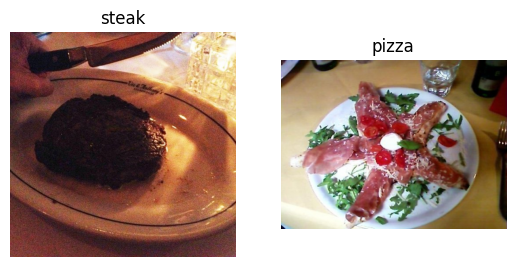

In [ ]:
import matplotlib.pyplot as plt
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")

plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"



Our next step is to turn our data into **batches**.

A batch is a smakk subset of data. Rather than look at all ~10000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10000 images (or more) might not fit into the memory of our processor (GPU).
2. Trying to learn the patterns in 10000 images in one hit could result in the model not not being able to learn very well.


In [ ]:
# Create train and test data generators amd rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_data_generator.flow_from_directory(directory=train_dir,
                                                      target_size=(224, 224),
                                                      class_mode="binary",
                                                      batch_size=32)

test_data = test_data_generator.flow_from_directory(directory=test_dir,
                                                    target_size=(224 ,224),
                                                    class_mode="binary",
                                                    batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a train data batch
images, labels = train_data.__next__() # get the "next" batch of images/labelsin train data
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there?
len(train_data)

47

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.56078434, 0.63529414, 0.79215693],
          [0.5647059 , 0.6392157 , 0.7960785 ],
          [0.5647059 , 0.6392157 , 0.80392164],
          ...,
          [0.07843138, 0.08235294, 0.05882353],
          [0.08235294, 0.08235294, 0.07450981],
          [0.09803922, 0.09803922, 0.09803922]],
 
         [[0.5647059 , 0.6392157 , 0.7960785 ],
          [0.5568628 , 0.6313726 , 0.7960785 ],
          [0.5568628 , 0.6313726 , 0.7960785 ],
          ...,
          [0.09803922, 0.10196079, 0.07058824],
          [0.0627451 , 0.06666667, 0.04705883],
          [0.04313726, 0.04313726, 0.03529412]],
 
         [[0.5686275 , 0.6431373 , 0.8078432 ],
          [0.5647059 , 0.6392157 , 0.80392164],
          [0.5647059 , 0.6392157 , 0.8078432 ],
          ...,
          [0.07450981, 0.07843138, 0.04705883],
          [0.15686275, 0.16078432, 0.13725491],
          [0.21568629, 0.21960786, 0.20000002]],
 
         ...,
 
         [[0.3921569 , 0.34901962, 0.22352943],
          [0.39607

In [ ]:
# View the first batch of labels
labels

array([0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baselien is a relatively simple model or existing result that we setup when beginning a machine learning experiment and then as we keep experimenting, we try to beat the baseline.

Note: In deep learning there is almost an infinite amount of architectures we could create. So one of the best ways to get started is to start with something simple and see if it works on our data and then introduce complexity as required (e.g. look at which current model is performing best in the field for our problem).

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, BatchNormalization
from tensorflow.keras import Sequential

# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, # filter is the number of sliding window going across an input (higher = more complex model)
           kernel_size=3, # the size of the sliding window going across an input
           strides=1, # the size of the step the sliding window takes across an input
           padding="valid", # if "same", output shape is same as input shape, if "valid", outputshape gets compressed
           activation="relu",
           input_shape=(224, 224, 3)), # input layer (specify input shape)

    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)
])



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


In [ ]:
# Get a summary of our model
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 218, 218, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 475240)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │       475,241 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 477,341 (1.82 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

### 4. Fit the model

In [ ]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 209ms/step - accuracy: 0.5331 - loss: 3.4514 - val_accuracy: 0.6900 - val_loss: 0.5754
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 116ms/step - accuracy: 0.7209 - loss: 0.5431 - val_accuracy: 0.7620 - val_loss: 0.4912
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.8375 - loss: 0.3862 - val_accuracy: 0.8000 - val_loss: 0.4851
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - accuracy: 0.9366 - loss: 0.2127 - val_accuracy: 0.7220 - val_loss: 0.6097
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.9843 - loss: 0.0738 - val_accuracy: 0.7480 - val_loss: 0.6279


In [ ]:
model_1.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.8419 - loss: 0.3632


[0.3354812264442444, 0.8500000238418579]

In [ ]:
model_4.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.7663 - loss: 0.5468


[0.6278979778289795, 0.7480000257492065]

### 5. Evaluating our model

It looks like our model is learning something, let's evaluate it.

<Axes: >

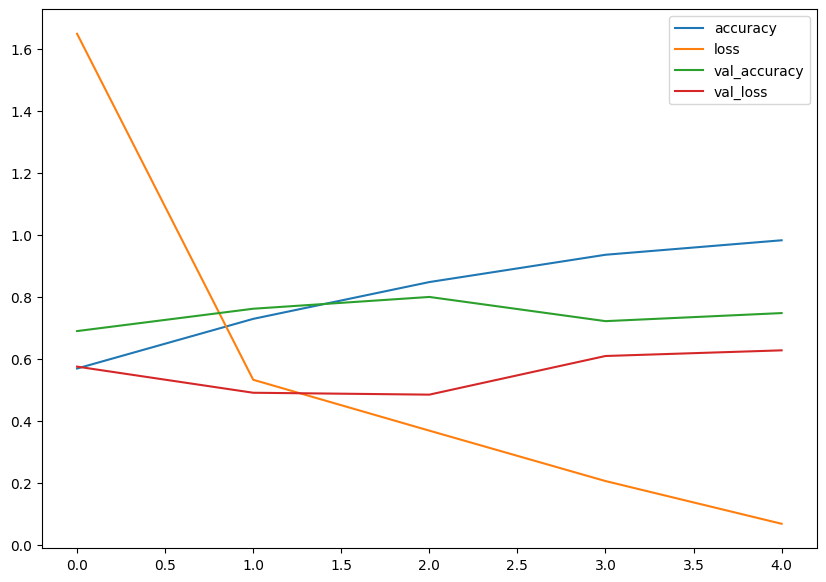

In [ ]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [146]:
# Plot the validation and trainin curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot the accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

> Note: When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the trainins dataset *too well* and thus the model's ability to generalize to unseen data will be diminished.

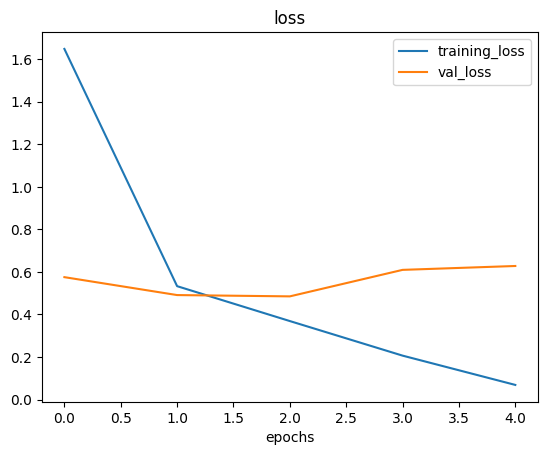

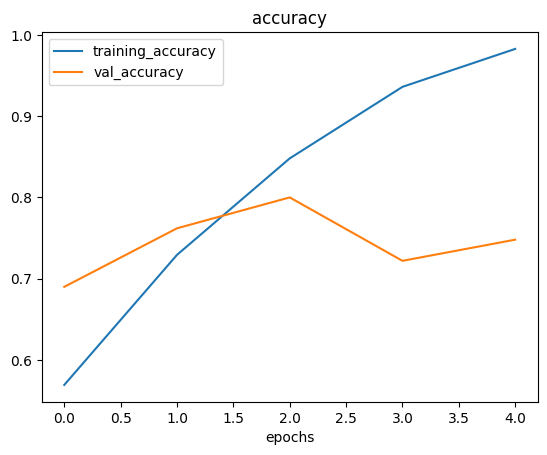

In [ ]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

> Note:Ideally, the two loss curves (training and validation) will be very similar to each other (training loss and validation loss decreasing at similar rates), when there are large differences like this, our model may be overfitting.

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:
* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

In [ ]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 174ms/step - accuracy: 0.6030 - loss: 0.6535 - val_accuracy: 0.7640 - val_loss: 0.4865
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.7471 - loss: 0.5271 - val_accuracy: 0.8280 - val_loss: 0.4195
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.8177 - loss: 0.4247 - val_accuracy: 0.7920 - val_loss: 0.4454
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.8024 - loss: 0.4292 - val_accuracy: 0.8560 - val_loss: 0.3375
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - accuracy: 0.8485 - loss: 0.3646 - val_accuracy: 0.8580 - val_loss: 0.3299


In [ ]:
# Get a summary of  our model with max pooling
model_5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

In [ ]:
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 218, 218, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 475240)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │       475,241 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,432,025 (5.46 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 954,684 (3.64 MB)

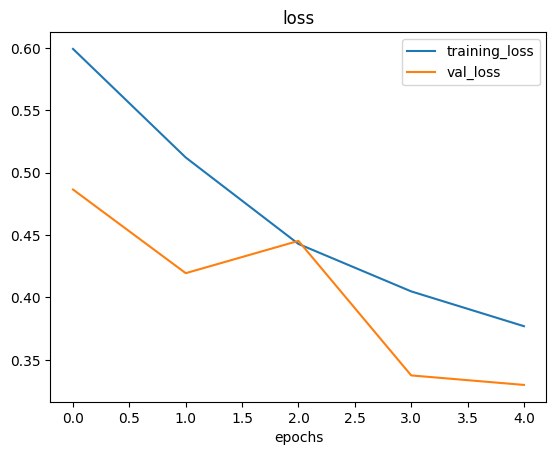

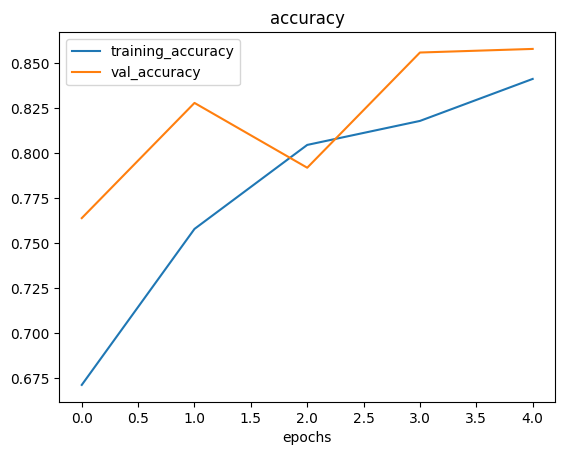

In [ ]:
# Plot loss curves
plot_loss_curves(history_5)

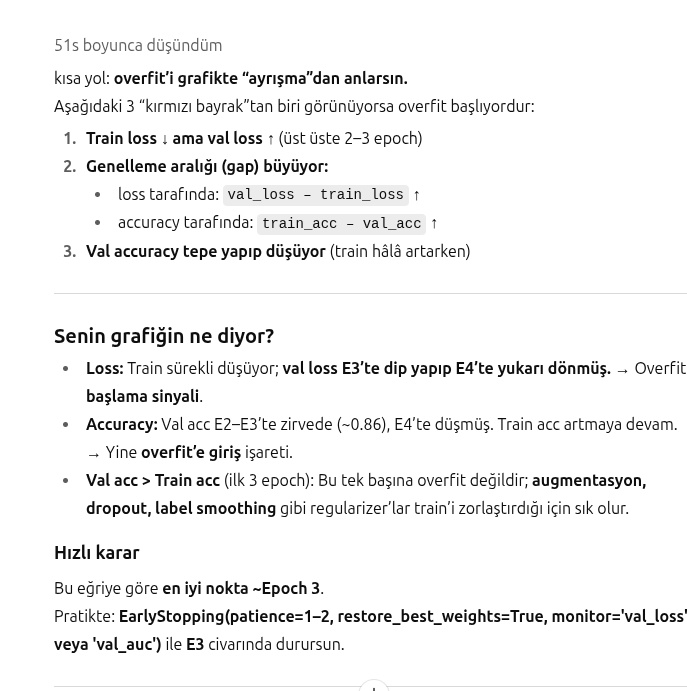

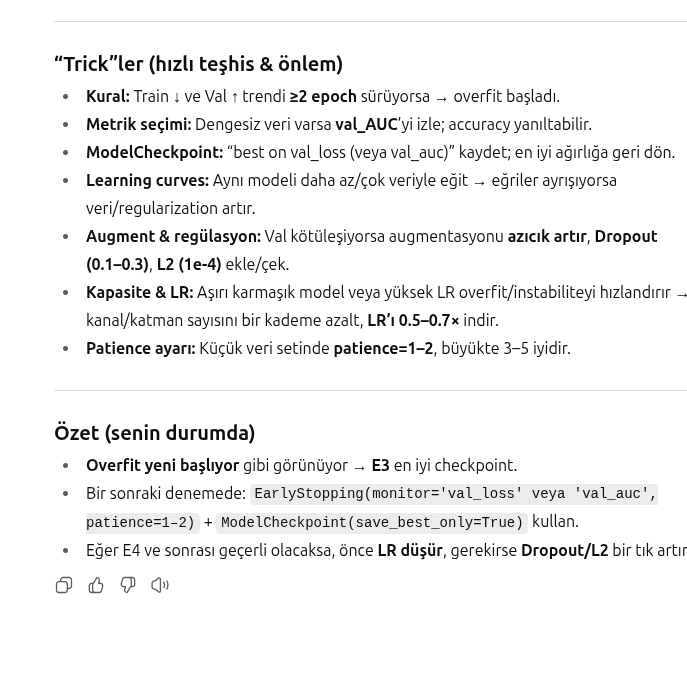

### Opening our bag of tricks and finding data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_data_generator_augmented = ImageDataGenerator(rescale=1./255,
                                                    rotation_range=0.2, # how much do we want wo rotate an image?
                                                    shear_range=0.2, # how much do we want to shear an image?
                                                    zoom_range=0.2, # zoom in randomly on an image
                                                    width_shift_range=0.2, # move our image around on the x-axis
                                                    height_shift_range=0.3, # move our image around on the y-axis
                                                    horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_data_generator = ImageDataGenerator(rescale=1./255)

# Create ImageDataGenerator without data augmentation for the test dataset
test_data_generator = ImageDataGenerator(rescale=1./255)




Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation...

In [ ]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_data_generator_augmented.flow_from_directory(train_dir,
                                                                          target_size=(224, 224),
                                                                          batch_size=32,
                                                                          class_mode="binary",
                                                                          shuffle=False)
# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_data_generator.flow_from_directory(train_dir,
                                                       target_size=(224, 224),
                                                       batch_size=32,
                                                       class_mode="binary",
                                                       shuffle=False)

# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_data_generator.flow_from_directory(test_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode="binary")

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


Note: Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

In [ ]:
# Get sample augmented data batches
images, labels = train_data.__next__()
augmented_images, augmented_labels = train_data_augmented.__next__()  # note: labels aren't augmented, only data(images)


Showing image number: 17


(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

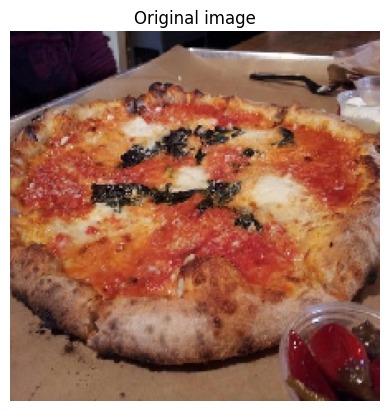

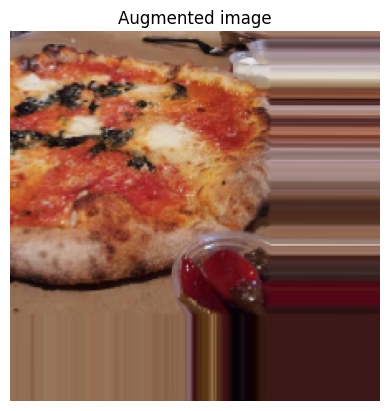

In [ ]:
# Show original image and augmented image
import random
random_number = random.randint(0, 32) # our batch sizes are 32....
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title("Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented image")
plt.axis(False)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Build the model
model_6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
model_6.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 24, 24, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 22, 22, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 4840)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │         4,841 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,761 (34.22 KB)

 Trainable params: 8,761 (34.22 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                     patience=5,
                                     restore_best_weights=True,
                                     ),
    tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                         factor=0.5,
                                         patience=2,
                                         min_lr=1e-6,
                                         verbose=1)
]


In [ ]:
# Fit the model
history_6 = model_6.fit(train_data_augmented,
            epochs=10,
            steps_per_epoch=len(train_data_augmented),
            validation_data=valid_data,
            validation_steps=len(valid_data),
            callbacks=callbacks
            )

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 26s 479ms/step - accuracy: 0.5591 - loss: 0.7635 - val_accuracy: 0.4960 - val_loss: 0.6929 - learning_rate: 0.0010
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 439ms/step - accuracy: 0.5066 - loss: 0.6937 - val_accuracy: 0.5400 - val_loss: 0.6925 - learning_rate: 0.0010
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 407ms/step - accuracy: 0.5917 - loss: 0.6920 - val_accuracy: 0.5000 - val_loss: 0.7489 - learning_rate: 0.0010
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 427ms/step - accuracy: 0.3960 - loss: 0.7320 - val_accuracy: 0.6080 - val_loss: 0.6918 - learning_rate: 0.0010
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 428ms/step - accuracy: 0.4968 - loss: 0.6941 - val_accuracy: 0.5560 - val_loss: 0.6915 - learning_rate: 0.0010
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 403ms/step - accuracy: 0.4985 - loss: 0.6932 - val_accuracy: 0.7060 - val_loss: 0.6852 - learning_rate: 0.0010
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 429ms/step - accuracy: 0.6396 - loss: 0.

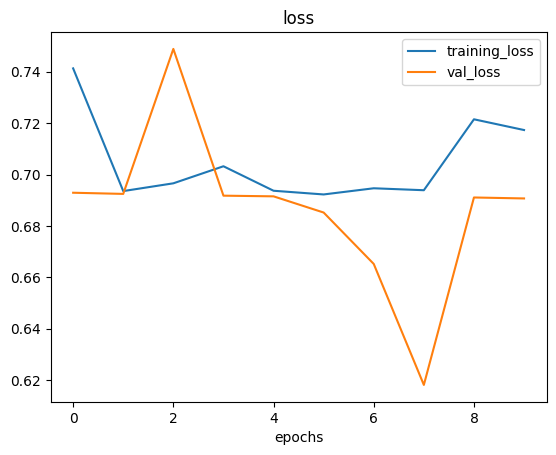

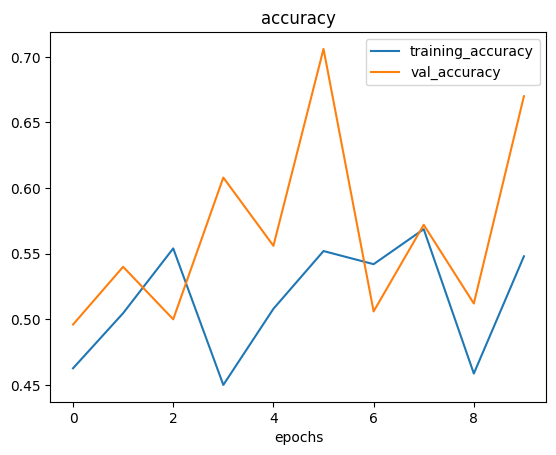

In [ ]:
plot_loss_curves(history_6)

In [ ]:
from tensorflow.keras.layers import ReLU, Dropout, GlobalAveragePooling2D

model_7 = Sequential([
    # Block 1
    Conv2D(32, 3, padding="same", use_bias=False, input_shape=(224, 224, 3)),
    BatchNormalization(), ReLU(),
    Conv2D(32, 3, padding="same", use_bias=False),
    BatchNormalization(), ReLU(),
    MaxPool2D(), Dropout(0.2),

    # Block 2
    Conv2D(64, 3, padding="same", use_bias=False),
    BatchNormalization(), ReLU(),
    Conv2D(64, 3, padding="same", use_bias=False),
    BatchNormalization(), ReLU(),
    MaxPool2D(), Dropout(0.3),

    # Block 3
    Conv2D(128, 3, padding="same", use_bias=False),
    BatchNormalization(), ReLU(),
    Conv2D(128, 3, padding="same", use_bias=False),
    BatchNormalization(), ReLU(),

    GlobalAveragePooling2D(),
    Dropout(0.4),
    Dense(1, activation="sigmoid")

])

try:
    optimizer = tf.keras.optimizers.AdamW(learning_rate=3e-4, weight_decay=1e-4)

except:
  optimizer = tf.keras.optimizers.Adam(learning_rate=3e-4)


In [ ]:
# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=optimizer,
                metrics=["accuracy"])


callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=1, min_lr=1e-6, verbose=1),
    tf.keras.callbacks.ModelCheckpoint("best_model_7.keras", monitor="val_loss", save_best_only=True)
]

In [ ]:
# Fit the model
model_7.fit(train_data_augmented,
            epochs=15,
            steps_per_epoch=len(train_data_augmented),
            validation_data=valid_data,
            validation_steps=len(valid_data),
            callbacks=callbacks)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 68s 920ms/step - accuracy: 0.5024 - loss: 0.7217 - val_accuracy: 0.4100 - val_loss: 0.6936 - learning_rate: 3.0000e-04
Epoch 2/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 789ms/step - accuracy: 0.5518 - loss: 0.6896
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.0001500000071246177.
47/47 ━━━━━━━━━━━━━━━━━━━━ 63s 901ms/step - accuracy: 0.5519 - loss: 0.6897 - val_accuracy: 0.5000 - val_loss: 0.7009 - learning_rate: 3.0000e-04
Epoch 3/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 667ms/step - accuracy: 0.6300 - loss: 0.6529
Epoch 3: ReduceLROnPlateau reducing learning rate to 7.500000356230885e-05.
47/47 ━━━━━━━━━━━━━━━━━━━━ 72s 696ms/step - accuracy: 0.6308 - loss: 0.6522 - val_accuracy: 0.5000 - val_loss: 0.7042 - learning_rate: 1.5000e-04


Let's shuffle our augmented training data and train another model (the same as before) on it and see what happens

In [ ]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_data_generator_augmented.flow_from_directory(train_dir,
                                                                         target_size=(224, 224),
                                                                         class_mode="binary",
                                                                         batch_size=32,
                                                                         shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])


In [ ]:
# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 46s 844ms/step - accuracy: 0.5569 - loss: 0.6838 - val_accuracy: 0.7240 - val_loss: 0.5446
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 34s 728ms/step - accuracy: 0.7313 - loss: 0.5750 - val_accuracy: 0.8380 - val_loss: 0.4401
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 29s 459ms/step - accuracy: 0.7313 - loss: 0.5603 - val_accuracy: 0.8540 - val_loss: 0.4029
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 432ms/step - accuracy: 0.7476 - loss: 0.5267 - val_accuracy: 0.8200 - val_loss: 0.4198
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 459ms/step - accuracy: 0.7545 - loss: 0.5317 - val_accuracy: 0.7180 - val_loss: 0.5300


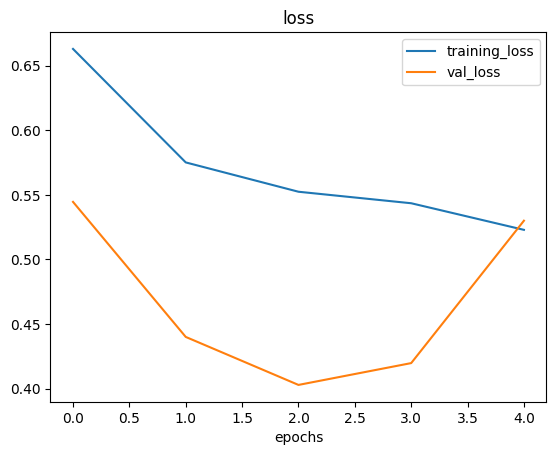

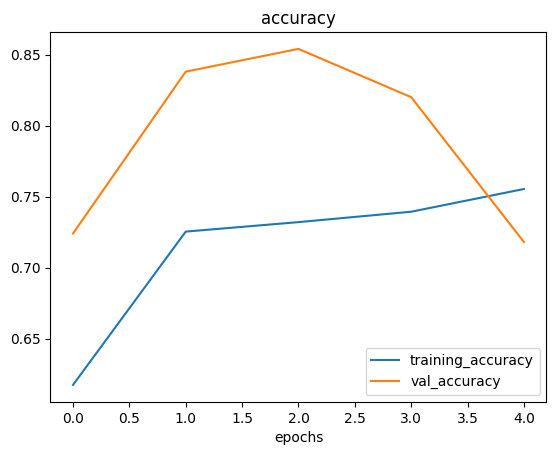

In [ ]:
plot_loss_curves(history_7)

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D` / `MaxPool2D`layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learnt and adjust it for our own use case


## Making a prediction with our trained model on our own custom data

In [ ]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2025-09-09 18:13:06--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.4’

03-steak.jpeg.4     100%[===================>]   1.89M  --.-KB/s    in 0.03s   

2025-09-09 18:13:06 (66.2 MB/s) - ‘03-steak.jpeg.4’ saved [1978213/1978213]



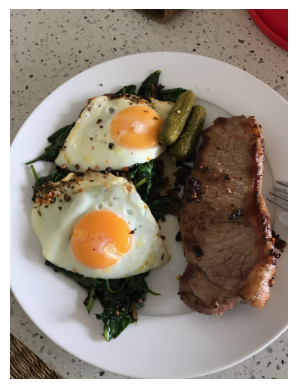

In [ ]:
 # View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

In [ ]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 111],
        [142, 121, 100],
        [101,  80,  59],
        ...,
        [164, 155, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  96],
        [138, 118,  94],
        [106,  85,  64],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 126, 102],
        [148, 128, 103],
        [114,  93,  72],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [143, 132, 126]]

In [ ]:
expanded_steak = tf.expand_dims(steak, axis=0)

**Note:** When we train a neural network and we want to make a prediction with it on our own custom data, it's important that our custom data (or new data) is preprocessed into the same format as the data our model was trained on.

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, color_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor
  img = tf.image.decode_image(img)

  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img / 255.

  return img

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


In [ ]:
# Set the random
tf.random.set_seed(42)

Looks like our custom image is being put through our model, however it currently outputs a prediction proabability, wouldn't it be nice if we could visualize the image as well asthe model's prediction?

In [ ]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

np.str_('steak')

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as the title.
  """

  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


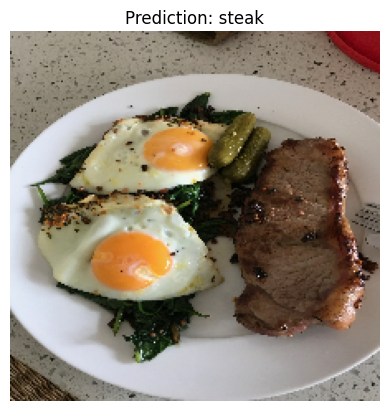

In [ ]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

Our model works! Let's try it on another image... This time pizza

--2025-09-09 18:13:32--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.2’

03-pizza-dad.jpeg.2 100%[===================>]   2.74M  --.-KB/s    in 0.03s   

2025-09-09 18:13:33 (85.8 MB/s) - ‘03-pizza-dad.jpeg.2’ saved [2874848/2874848]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


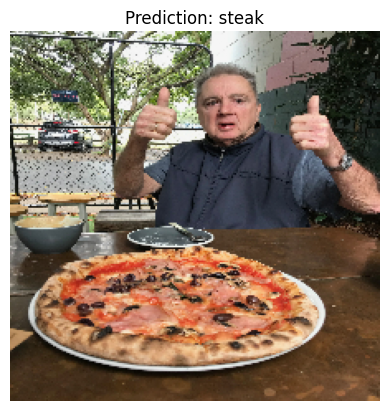

In [ ]:
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

# Multi-class Image Classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs. steak), now we're going to step things up a notch with 10 classes of food. (multi-class classification).

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfittin)
7. Repeat until satisfied


## 1. Import and become one with the data

In [133]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2025-09-09 19:09:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.69.207, 108.177.96.207, 108.177.119.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.69.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  40.0MB/s    in 13s     

2025-09-09 19:10:00 (38.7 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [134]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.

In [135]:
!ls -la 10_food_classes_all_data/

total 16
drwxr-xr-x  4 root root 4096 Sep  9 18:17 .
drwxr-xr-x  1 root root 4096 Sep  9 19:09 ..
drwxr-xr-x 12 root root 4096 Sep  9 18:17 test
drwxr-xr-x 12 root root 4096 Sep  9 18:17 train


In [136]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
validation_dir = "10_food_classes_all_data/test/"

In [137]:
# Let's get the class names
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted(item.name for item in data_dir.glob("*")))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [138]:
random.choice(class_names)

np.str_('steak')

['213644.jpg']
Image shape: (512, 384, 3)


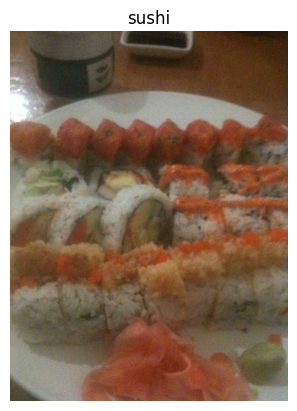

In [139]:
# Visualize, visualize, visualize
import random

img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for the model)

In [140]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG

# Rescale
train_data_generator = IDG(rescale=1. / 255)
validation_data_generator = IDG(rescale=1. / 255)

# Load data in from directories and turn it into batches
train_data = train_data_generator.flow_from_directory(train_dir,
                                                      target_size=(224, 224),
                                                      class_mode="categorical",
                                                      batch_size=32)

validation_data = validation_data_generator.flow_from_directory(validation_dir,
                                                                target_size=(224, 224),
                                                                class_mode="categorical",
                                                                batch_size=32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

We've been talking a lot about CNN explainer website... How about we just take their model (also on 10 classes) and use it for our problem.

In [141]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Build the model (very similar to previous models but actually the same as CNN explainer webiste)
model_8 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation(activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax") # changed to have 10 output neurons and use the softmax activation function
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [142]:
# Compile the model
model_8.compile(loss="categorical_crossentropy",
              optimizer="adam",
                metrics=["accuracy"])

### 4. Fit the model


In [143]:
# Fit the model
history_8 = model_8.fit(train_data, # 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=validation_data,
                        validation_steps=len(validation_data))


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 47s 189ms/step - accuracy: 0.1587 - loss: 2.2114 - val_accuracy: 0.2868 - val_loss: 1.9908
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 37s 159ms/step - accuracy: 0.3281 - loss: 1.9192 - val_accuracy: 0.3276 - val_loss: 1.8684
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 33s 139ms/step - accuracy: 0.4219 - loss: 1.7111 - val_accuracy: 0.3764 - val_loss: 1.8057
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 109ms/step - accuracy: 0.5371 - loss: 1.3984 - val_accuracy: 0.3544 - val_loss: 1.8592
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 33s 138ms/step - accuracy: 0.6991 - loss: 0.9259 - val_accuracy: 0.3520 - val_loss: 2.1004


 ### 5. Evaluate the model

In [144]:
# Evaluate on the test data
model_8.evaluate(validation_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - accuracy: 0.3440 - loss: 2.1368


[2.1003589630126953, 0.35199999809265137]

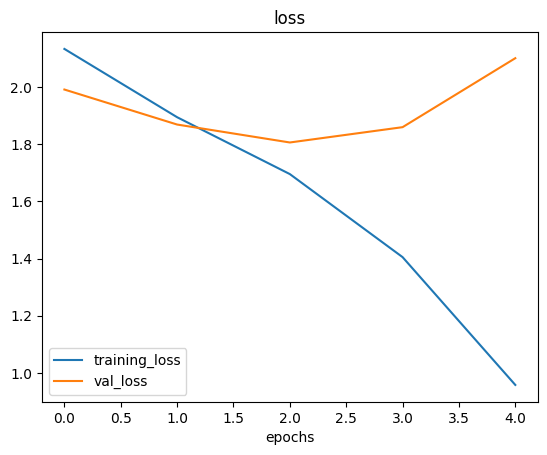

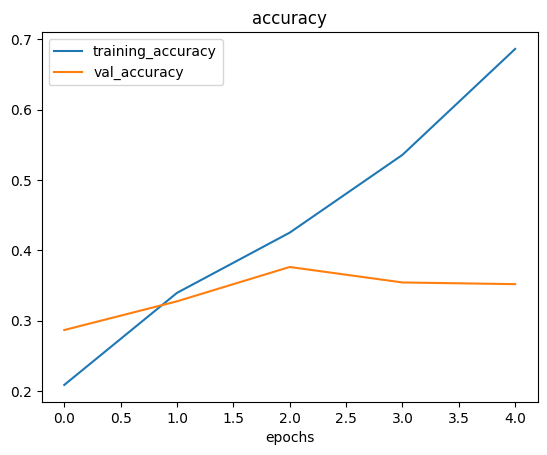

In [145]:
plot_loss_curves(history_8)

What do these loss curves tell us?

Well... It seems our model is **overfitting** the training set quite badly... In other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test dataset.

### 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

Due to its performance on the training data, it's clear our model is learning something...

However, it's not generalizing well to unseen data (overfitting).

So, let's try and fix overfitting by...

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns...
* **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce number of layers or reduce  number of hidden units in layers.
* **Use data augmentation** -  data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** -  transfer learning leverages the patterns  another model has learned on similar data to our own and allows us to use those patterns on our own dataset

In [147]:
model_8.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 222, 222, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │       280,910 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 851,762 (3.25 MB)

 Trainable params: 283,920 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 567,842 (2.17 MB)

In [148]:
# How about we try and simplify the model first?
# Let's try to remove 2 convolutional layers...
model_9 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [149]:
# Compile the model
model_9.compile(loss="categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

In [150]:
model_9.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 29160)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │       291,610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 292,800 (1.12 MB)

 Trainable params: 292,800 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

In [151]:
# Fit the model
history_9 = model_9.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=validation_data,
            validation_steps=len(validation_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 124ms/step - accuracy: 0.1878 - loss: 2.4741 - val_accuracy: 0.3124 - val_loss: 1.9539
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 33s 140ms/step - accuracy: 0.3562 - loss: 1.8551 - val_accuracy: 0.3548 - val_loss: 1.8560
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 109ms/step - accuracy: 0.4867 - loss: 1.5538 - val_accuracy: 0.3556 - val_loss: 1.8711
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 30s 129ms/step - accuracy: 0.6498 - loss: 1.1381 - val_accuracy: 0.3232 - val_loss: 2.1253
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 37s 113ms/step - accuracy: 0.7972 - loss: 0.7246 - val_accuracy: 0.3272 - val_loss: 2.3891


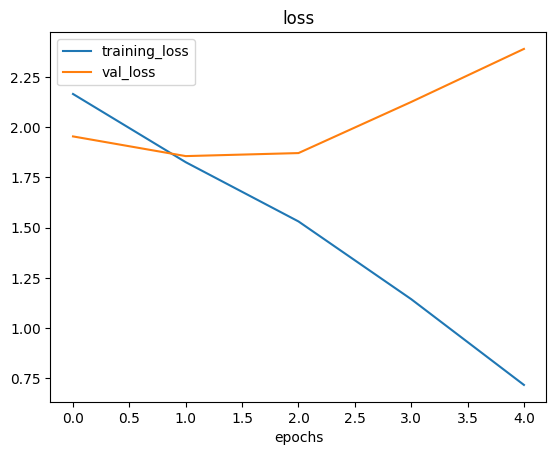

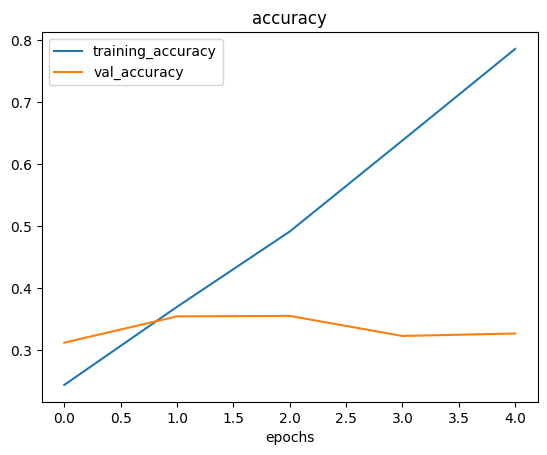

In [152]:
# Check out the loss curves
plot_loss_curves(history_9)

Looks like our "simplifying the model" experiment didn't work... The accuracy went down and overfitting continued....
How about we try data augmentation?

### Trying to reduce overfitting with data augmentation

Let's try and improve our model's results by using augmented training data...

Ideally, we want to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy

In [153]:
# Create an augmented data generator instance
train_data_generator_augmented = IDG(rescale=1. / 255,
                                     rotation_range=0.02,
                                     width_shift_range=0.02,
                                     height_shift_range=0.02,
                                     zoom_range=0.2,
                                     horizontal_flip=True)

train_data_augmented = train_data_generator_augmented.flow_from_directory(train_dir,
                                                                         target_size=(224, 224),
                                                                         class_mode="categorical",
                                                                         batch_size=32)

Found 7500 images belonging to 10 classes.


In [154]:
# Let's create another model but this time we'll fit it on the augmented training data
model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned model (using the same setup as previous models)
model_10.compile(loss="categorical_crossentropy",
                 optimizer="adam",
                 metrics=["accuracy"])

In [155]:
model_8.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 222, 222, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │       280,910 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 851,762 (3.25 MB)

 Trainable params: 283,920 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 567,842 (2.17 MB)

In [156]:
model_10.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 222, 222, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │       280,910 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 283,920 (1.08 MB)

 Trainable params: 283,920 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

In [158]:
# Fit the model
history_10 = model_10.fit(train_data_augmented,
             epochs=5,
             steps_per_epoch=len(train_data_augmented),
             validation_data=validation_data,
             validation_steps=len(validation_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 109s 461ms/step - accuracy: 0.1896 - loss: 2.1836 - val_accuracy: 0.2868 - val_loss: 2.0198
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 107s 456ms/step - accuracy: 0.2804 - loss: 2.0241 - val_accuracy: 0.3400 - val_loss: 1.9081
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 103s 438ms/step - accuracy: 0.3154 - loss: 1.9493 - val_accuracy: 0.3512 - val_loss: 1.8588
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 106s 450ms/step - accuracy: 0.3592 - loss: 1.8700 - val_accuracy: 0.3676 - val_loss: 1.8307
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 142s 449ms/step - accuracy: 0.3748 - loss: 1.8268 - val_accuracy: 0.3616 - val_loss: 1.8452


In [160]:
model_8.evaluate(validation_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 111ms/step - accuracy: 0.3455 - loss: 2.1099


[2.1003596782684326, 0.35199999809265137]

In [161]:
model_10.evaluate(validation_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 140ms/step - accuracy: 0.3559 - loss: 1.8585


[1.8452152013778687, 0.36160001158714294]

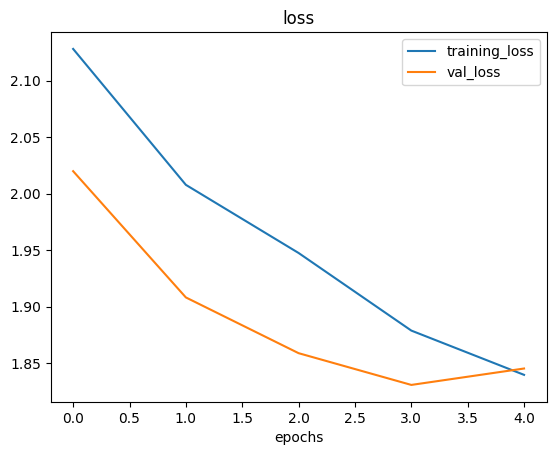

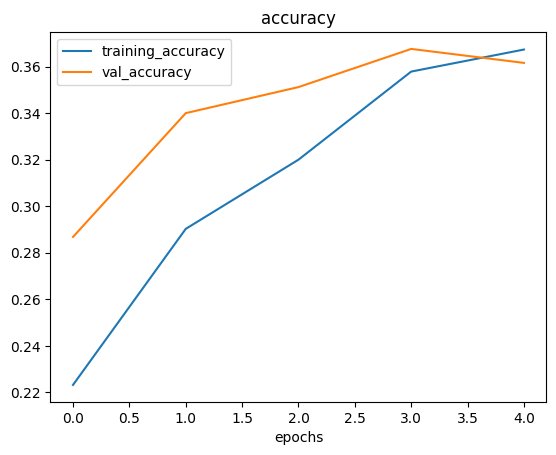

In [162]:
# Chock out our model trained on augmented data's loss curves
plot_loss_curves(history_10)

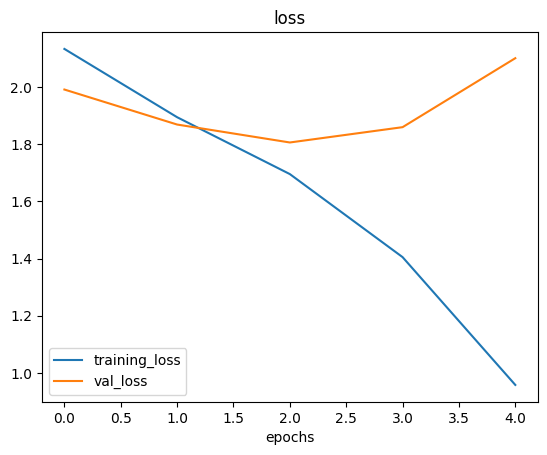

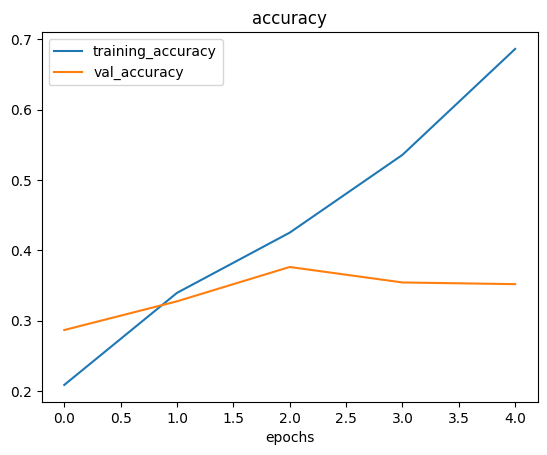

In [163]:
plot_loss_curves(history_8)

Woah! That looks much better, the los curves are much closer to each other than the baseline model and they look like they're heading the right direction (certainly not the wrong direction) so if we were to train for longer, we might see further improvements.

### 7. Repeat until satisfied
We could keep going here... Continually trying to bring our loss curves closer together and trying to validation/test accuracy.

How?

By running lots of experiments, namely:
- restructuring our model's architecture (increasing layers / hidden units)
- adjust the learning rate
- try different methods of data augmentation (adjust the hypermparameters in our ImageDataGenerator instance)
- training for longer (e.g. 10 epochs instead of 5 epochs)


### Making a prediction with our trained model
Let' use our trained model to make some predictions on our own custom images!

In [166]:
# Remind ourselves of the classes our model is trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [167]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg


--2025-09-09 20:09:30--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.3’

03-pizza-dad.jpeg.3 100%[===================>]   2.74M  --.-KB/s    in 0.03s   

2025-09-09 20:09:30 (92.6 MB/s) - ‘03-pizza-dad.jpeg.3’ saved [2874848/2874848]

--2025-09-09 20:09:31--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awai

In [185]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class & get pred_class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


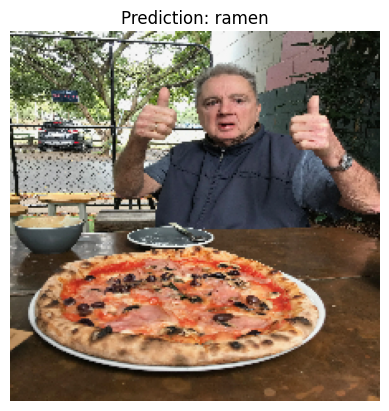

In [186]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
               filename="03-pizza-dad.jpeg",
               class_names=class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


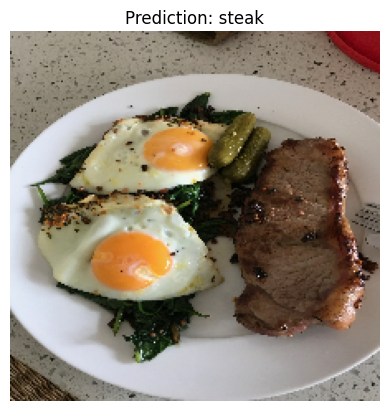

In [187]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
               filename="03-steak.jpeg",
               class_names=class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


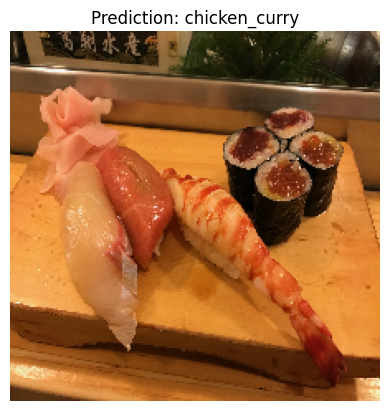

In [188]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
               filename="03-sushi.jpeg",
               class_names=class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


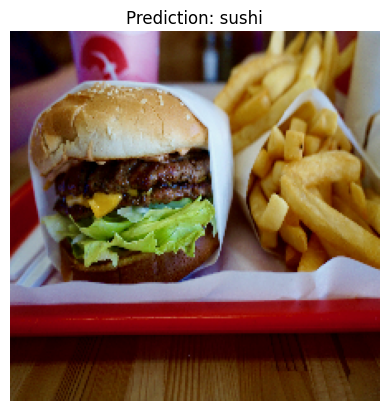

In [189]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
               filename="03-hamburger.jpeg",
               class_names=class_names)

In [190]:
# Good news: our updated pred_and_plot function works for binary classification too...
pred_and_plot(model=model_3, # trained on pizza vs. steak
              filename="03-steak.jpeg",
              class_names=["pizza", "steak"])

ValueError: Input 0 of layer "functional_2" is incompatible with the layer: expected shape=(None, 96, 96), found shape=(1, 224, 224, 3)

In [191]:
# Save a model
model_10.save("saved_trained_model_10")

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=saved_trained_model_10.

In [192]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.modes.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

AttributeError: module 'tensorflow.keras' has no attribute 'modes'

In [193]:
# Compare our model to our existing model
model_10.evaluate(test_data)

ValueError: Cannot take the length of shape with unknown rank.